In [7]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.rcParams['figure.figsize'] = (16,6)
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

# Data Creation

The linear function formulas are: y = mx + b (slope-intercept form) y−y1=m(x−x1) y − y 1 = m ( x − x 1 ) (point-slope form) Ax + By = C (standard form)

$$
f(x) = 2 \cdot X + 1
$$

In [8]:
x = np.arange(9)
y = 2*x + 1

df = pd.DataFrame({
    'x':x,
    'y':y
})

In [4]:
df

,x,y
0,0,1
1,1,3
2,2,5
3,3,7
4,4,9
5,5,11
6,6,13
7,7,15
8,8,17


# Linear Model

In [9]:
from sklearn import linear_model
lin_reg = linear_model.LinearRegression()

```Simple Model```

In [10]:
X = x[:, np.newaxis]
lin_reg.fit(X, df.y)

lin_reg.coef_

array([2.])

In [12]:
lin_reg.intercept_

0.9999999999999982

In [13]:
y_lin_reg = lin_reg.predict(X)

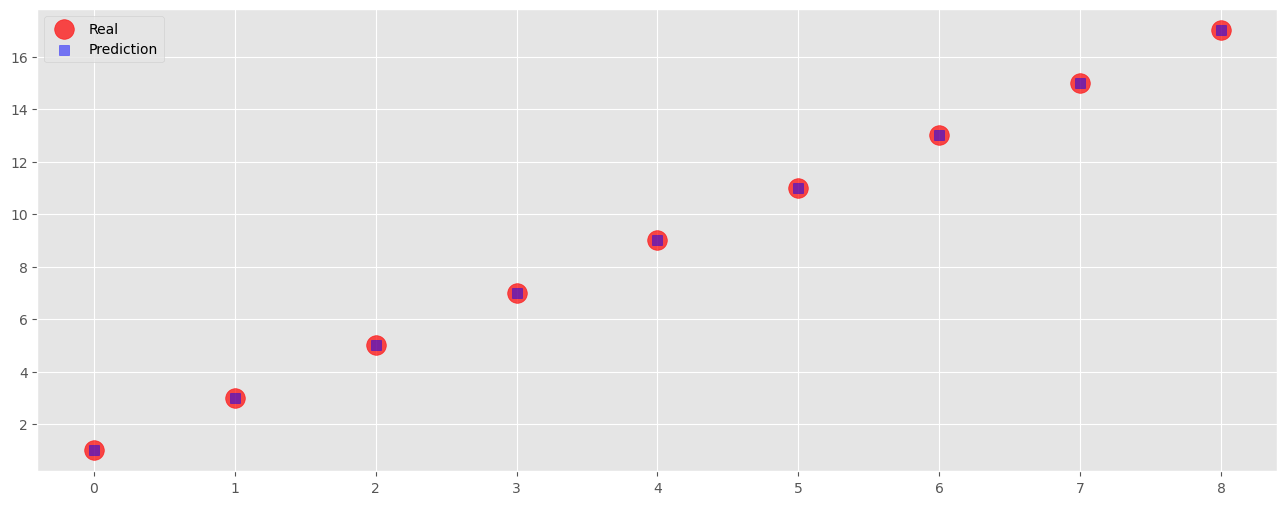

In [14]:
plt.scatter(X, y, alpha=.7, color='red', marker="o", label='Real', s=200)
plt.scatter(X, y_lin_reg, alpha=.5, color='blue', marker="s", label='Prediction', s=50)
plt.legend()

# Linear equation + noise

```Adding Complexity```


$$
f(x) = 2 \cdot X + 1 + noise
$$

In [16]:
import numpy as np
mu, sigma = 0, 0.9 # mean and std
noise = np.random.normal(mu, sigma, [20,1]).ravel() 
print(noise)

[ 0.8715873   2.47699428 -0.27743187  0.56181942  0.24111912  0.89012599
 -1.20714852 -0.09228608  0.72647039 -0.15720621 -0.38491616 -1.79855729
 -0.47979587 -0.54052417  0.12279384  0.07086034 -0.93885595 -0.68589093
 -0.96857646 -0.27136439]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


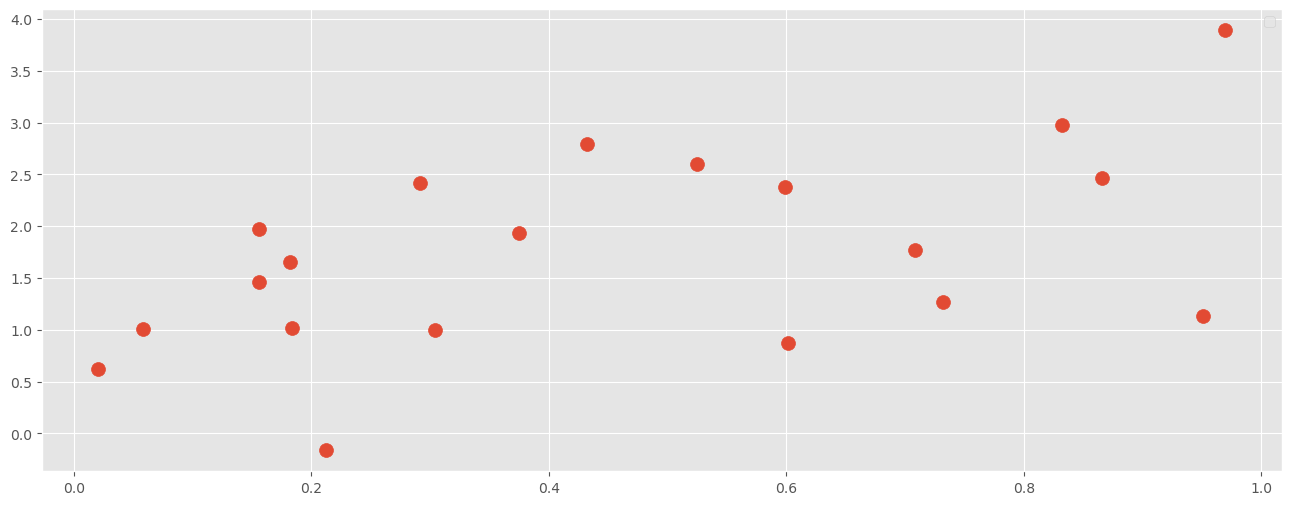

In [17]:
np.random.seed(42)

X = np.random.random(size=(20,1))

# Noise function creation
noise = np.random.randn(20)
# Draw random samples from a normal (Gaussian) distribution.
mu, sigma = 0, 0.9 # mean and std
noise = np.random.normal(mu, sigma, [20,1]).ravel() # creating a noise with the same dimension as the dataset (2,2) 

y = 2 * X.ravel() + 1 + noise # 𝑓(𝑥)=3⋅𝑋+2+𝑛𝑜𝑖𝑠𝑒

df = pd.DataFrame({
    'x':X.ravel(),
    'y':y
})

plt.scatter(X,y)
plt.legend()

# Lienar Regression

In [18]:
lin_reg.fit(X, y)

X_all = np.linspace(0, 1 , 100)[:, np.newaxis]

y_pred = lin_reg.predict(X_all)

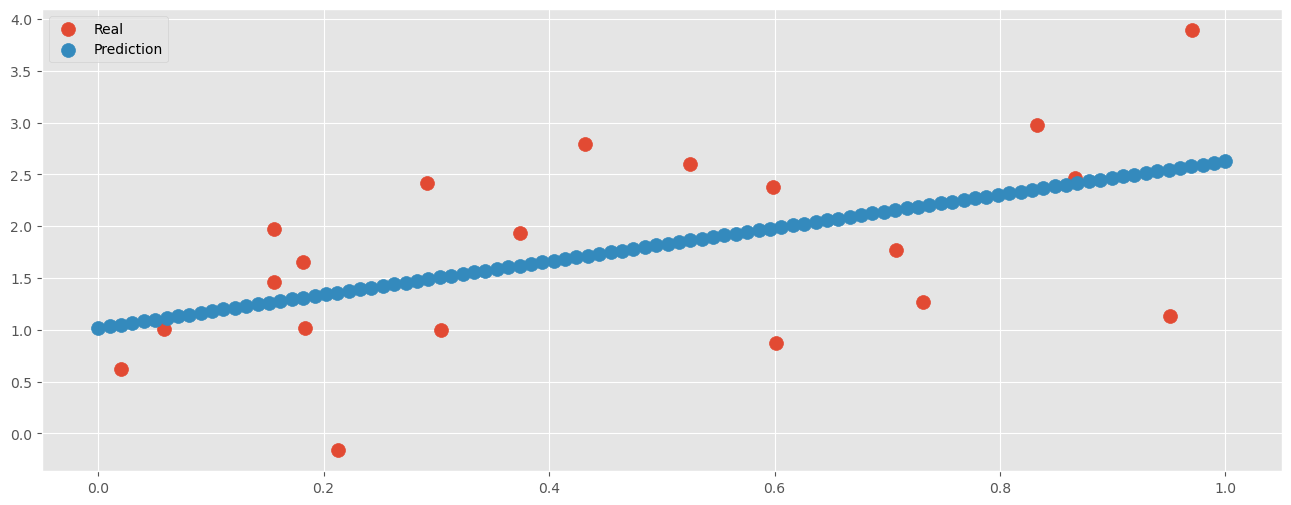

In [19]:
plt.scatter(X.ravel(), y, label='Real')
plt.scatter(X_all.ravel(), y_pred, label='Prediction')
plt.legend()

# Random Forest Regressor

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

rf = RandomForestRegressor()

In [21]:
rf.fit(X,y)
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [22]:
y_pred_rf = rf.predict(X)

In [23]:
df['y_pred_rf'] = y_pred_rf

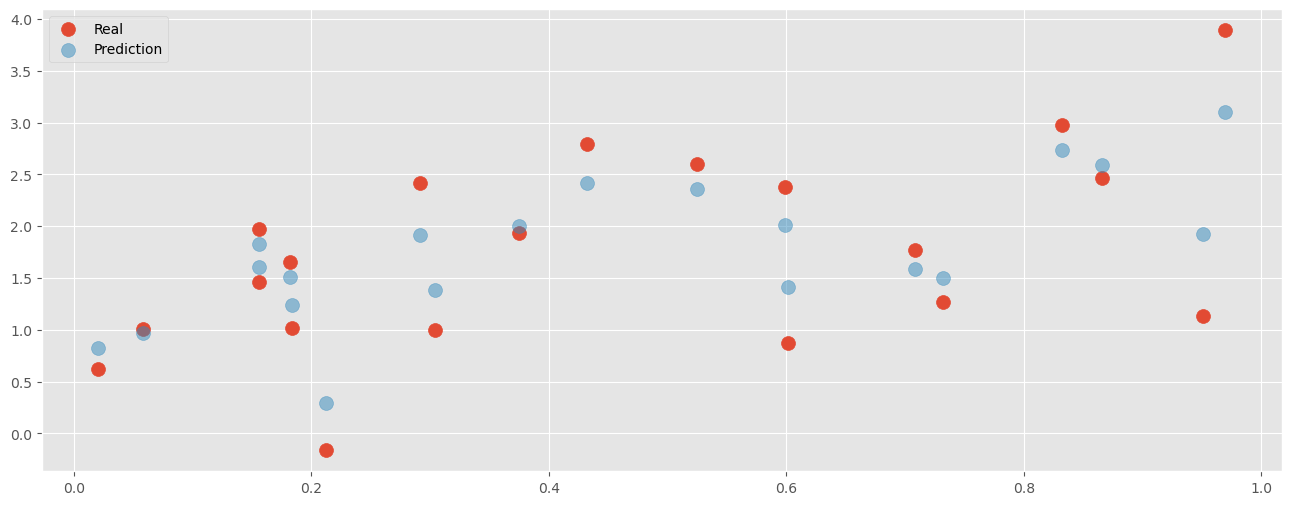

In [24]:
plt.scatter(df.x, y, label='Real')
plt.scatter(df.x, y_pred_rf, alpha=0.5, label='Prediction')
plt.legend()

In [25]:
# Mean absolute error (MAE)
mae = mean_absolute_error(y, y_pred_rf)
# Mean squared error (MSE)
mse = mean_squared_error(y, y_pred_rf)
# R-squared scores
r2 = r2_score(y, y_pred_rf)

# Print metrics
print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', round(mse, 2))
print('Root Mean Squared Error:', round(np.sqrt(mse), 2))
print('R-squared scores:', round(r2, 2))

Mean Absolute Error: 0.31
Mean Squared Error: 0.14
Root Mean Squared Error: 0.37
R-squared scores: 0.84
